In [1]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 16.1 MB/s eta 0:00:00


In [17]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
from google.colab.patches import cv2_imshow

In [2]:
#to connect to gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
img = cv2.imread('/content/drive/MyDrive/ITS_Angled/OCR/OIP.jpg')
OCR(img)

'Mho1av8866'

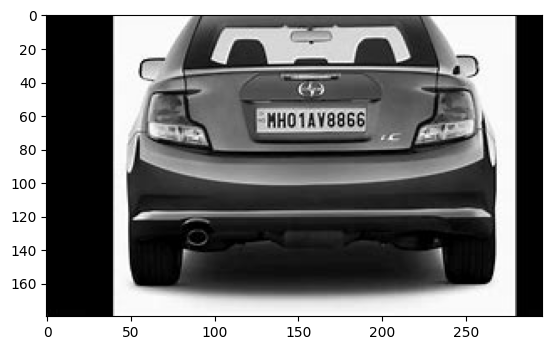

In [92]:
img = cv2.imread('/content/drive/MyDrive/ITS_Angled/OCR/OIP.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

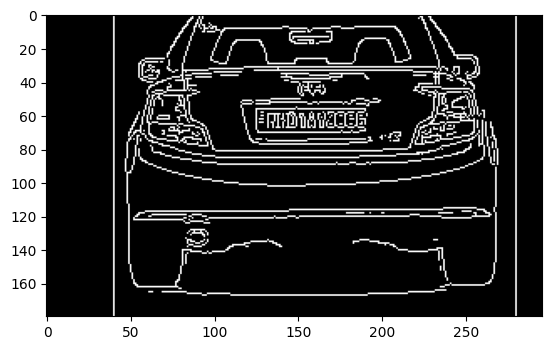

In [93]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [94]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [95]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [96]:
location

array([[[125,  56]],

       [[126,  70]],

       [[190,  69]],

       [[190,  56]]], dtype=int32)

In [97]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

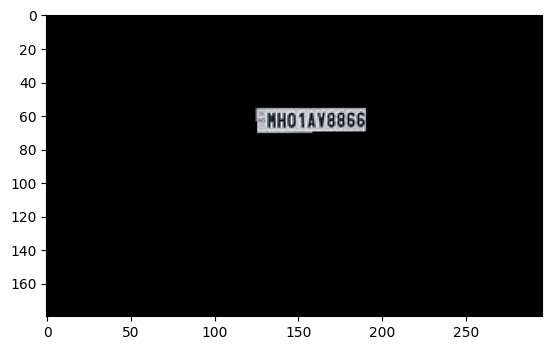

In [98]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [99]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

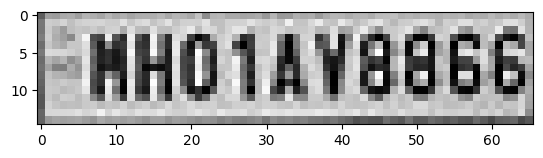

In [100]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [101]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[5, 0], [66, 0], [66, 15], [5, 15]], 'Mho1av8866', 0.15550220229108322)]

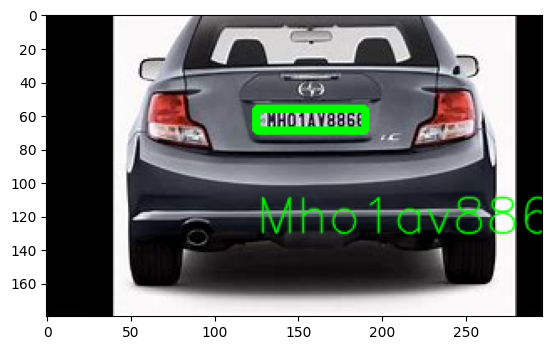

In [102]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=1, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 10.3 MB/s eta 0:00:00


OCR function that return no. plate text as output and takes image as input using OPENCV

In [63]:
def OCR(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 30, 200) #Edge detection
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    text = result[0][-2]
    return text


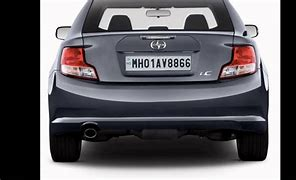

'Mho1av8866'

In [103]:
img = cv2.imread('/content/drive/MyDrive/ITS_Angled/OCR/OIP.jpg')
cv2_imshow(img)
num_plate = OCR(img)
num_plate

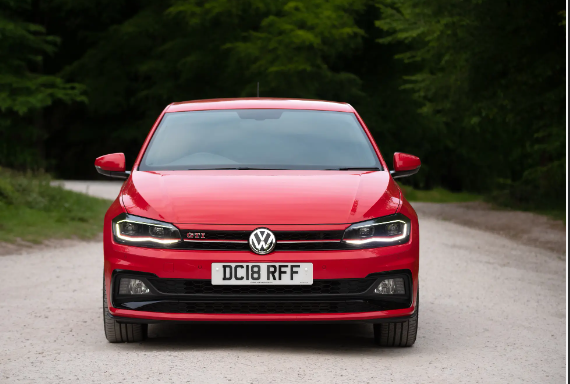

error: ignored

In [115]:
img = cv2.imread('/content/drive/MyDrive/ITS_Angled/OCR/car4.png')
cv2_imshow(img)
num_plate = OCR(img)
num_plate

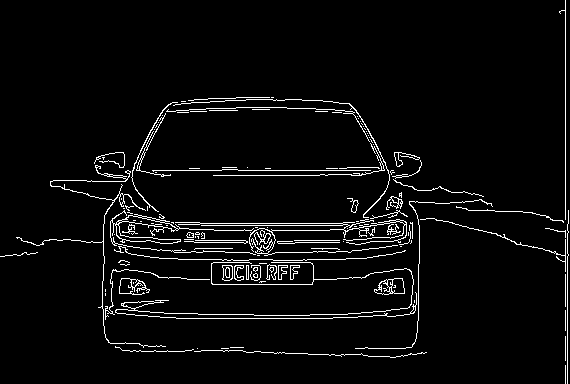

In [122]:
img = cv2.imread('/content/drive/MyDrive/ITS_Angled/OCR/car4.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
cv2_imshow(edged)
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

to find the coordinates of bounding boxes in the image


0: 384x640 5 cars, 54.0ms
Speed: 2.2ms preprocess, 54.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


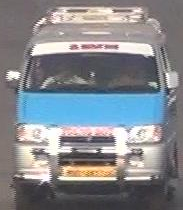

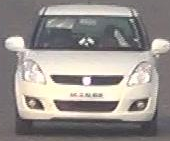

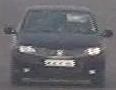

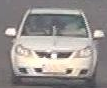

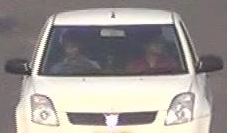

In [69]:
import cv2
import os
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the YOLOv8 model
model = YOLO('/content/drive/MyDrive/ITS_Angled/gausian_blur_2/data/NEW_RUN/runs/detect/train/weights/best.pt')
frame = cv2.imread('/content/drive/MyDrive/ITS_Angled/data/test/images/00000-0001_jpg.rf.2ff3abc52e97179fd9d3ad3cb737c617.jpg')
results = model.track(frame, persist=True,conf=0.5)
boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
ids = results[0].boxes.id.cpu().numpy().astype(int)
arr =[]
for box, id in zip(boxes, ids):
    cropped_img = frame[box[1]:box[3], box[0]:box[2]]
    cv2_imshow(cropped_img)
    #arr.append(OCR(cropped_img))
#arr


 Rough work


In [14]:
import cv2
import os
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the YOLOv8 model
model = YOLO('/content/drive/MyDrive/ITS_Angled/Number_plate_recognition/data/runs/detect/train2/weights/best.pt')
frame = cv2.imread('/content/drive/MyDrive/ITS_Angled/OCR/car4.png')
results = model(frame, persist=True,conf=0.5)
boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
ids = results[0].boxes.id.cpu().numpy().astype(int)
arr =[]
for box, id in zip(boxes, ids):
    cropped_img = frame[box[1]:box[3], box[0]:box[2]]
    cv2_imshow(cropped_img)

SyntaxError: ignored

In [12]:
import cv2
import os
import easyocr
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

#a funtion to convert image to text
def img_text(img):
  reader = easyocr.Reader(['en'])
  result = reader.readtext(cropped_image)
  text = result[0][-2]
  return text

frame = cv2.imread('/content/drive/MyDrive/ITS_Angled/OCR/car4.png')

# Load the YOLOv8 model
def OCR_yolo(frame):
    model = YOLO('/content/drive/MyDrive/ITS_Angled/Number_plate_recognition/data/runs/detect/train2/weights/best.pt')
    results = model.track(frame, persist=True,conf=0.5)
    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
    arr =[]
    for box, id in zip(boxes, ids):
        cropped_img = frame[box[1]:box[3], box[0]:box[2]]
        cv2_imshow(cropped_img)
        #arr.append(img_text(cropped_img))

In [ ]:
import cv2
import os
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the YOLOv8 model
model = YOLO('/content/drive/MyDrive/ITS_Angled/gausian_blur_2/data/NEW_RUN/runs/detect/train/weights/best.pt')
frame = cv2.imread('/content/drive/MyDrive/ITS_Angled/data/test/images/00000-0001_jpg.rf.2ff3abc52e97179fd9d3ad3cb737c617.jpg')
results = model.track(frame, persist=True,conf=0.5)
        # print(results)
if  results[0].boxes.id !=  None:
      boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
      ids = results[0].boxes.id.cpu().numpy().astype(int)
            for box, id in zip(boxes, ids):
                # Check if the id is unique
                int_id =int(id)
                if  int_id  not  in  ids:
                    ids.add(int_id)

                    # Crop the image using the bounding box coordinates
                    cropped_img = frame[box[1]:box[3], box[0]:box[2]]

                    # Save the cropped image with a unique filename
                    filename = f"cropped_img_{int_id}.jpg"
                    filepath = os.path.join(save_path, filename)
                    cv2.imwrite(filepath, cropped_img)

                # Draw the bounding box and id on the frame
                cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (85, 45, 255), 2, lineType=cv2.LINE_AA)
                cv2.putText(
                    frame,
                    f"Id {id}",
                    (box[0], box[1]),
                    0,
                    0.9,
                    [85, 45, 255],
                    2,
                    lineType=cv2.LINE_AA
                )
                cv2_imshow("Detected Frame", frame)
                if cv2.waitKey(1) & 0xFF == ord("q"):
                    break

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

In [41]:
import cv2
import os
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the YOLOv8 model
model = YOLO('/content/drive/MyDrive/ITS_Angled/gausian_blur_2/data/NEW_RUN/runs/detect/train/weights/best.pt')

# Open the video file
video_path = "/content/drive/MyDrive/ITS_Angled/tracking new video/30sec.mp4"
cap = cv2.VideoCapture(video_path)
save_path = "/content/drive/MyDrive/ITS_Angled/tracking new video/30sec_openCV.mp4"
# Loop through the video frames
file_num = 0
uniques_id=set()
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model.track(frame, persist=True,conf=0.7)
        # print(results)
        if  results[0].boxes.id !=  None:
            boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)

            ids = results[0].boxes.id.cpu().numpy().astype(int)
            for box, id in zip(boxes, ids):
                # Check if the id is unique
                int_id =int(id)
                if  int_id  not  in  ids:
                    ids.add(int_id)

                    # Crop the image using the bounding box coordinates
                    cropped_img = frame[box[1]:box[3], box[0]:box[2]]

                    # Save the cropped image with a unique filename
                    filename = f"cropped_img_{int_id}.jpg"
                    filepath = os.path.join(save_path, filename)
                    cv2.imwrite(filepath, cropped_img)

                # Draw the bounding box and id on the frame
                cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (85, 45, 255), 2, lineType=cv2.LINE_AA)
                cv2.putText(
                    frame,
                    f"Id {id}",
                    (box[0], box[1]),
                    0,
                    0.9,
                    [85, 45, 255],
                    2,
                    lineType=cv2.LINE_AA
                )
                cv2_imshow("Detected Frame", frame)
                if cv2.waitKey(1) & 0xFF == ord("q"):
                    break

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


0: 384x640 1 M2W, 2 cars, 2 rickshaws, 61.2ms
Speed: 4.2ms preprocess, 61.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


TypeError: ignored